In [1]:

%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from moses_cross_val.main import moses_runner, model_evaluator
from utils import *
from dataset_utils import *
import matplotlib.pyplot as plt

In [3]:
# train_file, test_file = train_test_df_split("data/tamoxBinary_top100_genes.csv", "posOutcome")
train_file, test_file = "data/tamoxBinary_top89_genes_train.csv", "data/tamoxBinary_top100_genes_test.csv"

In [4]:
moses_options = "-j 16 --balance 1 -m 100000 -W 1 --output-cscore 1 --result-count 100 " \
                "--reduct-knob-building-effort 2 --complexity-ratio 3 " \
                "--hc-crossover-min-neighbors 5000 --hc-fraction-of-nn .4 " \
                "--hc-crossover-pop-size 1200 --diversity-autoscale 1 " \
                "-f asmoses-top-89-feats.log -l DEBUG " \
                "--rel-types IntensionalSimilarity --feature-type ConceptNode " \
                "--scm-path /home/xabush/moses-incons-pen-xp/data/intensional_sim_top_89.scm "

Run ASMOSES with three different options

- No inconsistency penalty
- Inconsistency penalty with IntensionalSimilarity as the relation between the features (genes)
- Inconsistency penalty with IntensionalSimilarity as the relation between the features (genes) and penalty coefficient = 3
- Inconsistency penalty with IntensionalSimilarity as the relation between the features (genes) with diversity pressure


In [7]:
output_file = "data/tamoxBinary_top100_combo_1.txt"
runner = moses_runner.MosesRunner(train_file, output_file,
                                moses_options, target_feature="posOutcome")

In [13]:
runner.run_moses()

(-11,
 b'[2021-09-22 13:21:06:281] [INFO] moses version "3"."7"."0"\n[2021-09-22 13:21:06:281] [INFO] hostname: Ubuntu-1604-xenial-64-minimal\n[2021-09-22 13:21:06:282] [INFO] Command line: asmoses -i data/tamoxBinary_top100_genes_train.csv -o data/tamoxBinary_top100_combo_1.txt --target-feature posOutcome -j 16 --balance 1 -m 100000 -W 1 --output-cscore 1 --result-count 100 --reduct-knob-building-effort 2 --complexity-ratio 3 --hc-crossover-min-neighbors 5000 --hc-fraction-of-nn .4 --hc-crossover-pop-size 1200 --diversity-autoscale 1 -f asmoses-top-89-feats.log -l DEBUG --rel-types IntensionalSimilarity --feature-type ConceptNode --scm-path /home/xabush/moses-incons-pen-xp/data/intensional_sim_top_89.scm\n[2021-09-22 13:21:06:282] [INFO] Read data file data/tamoxBinary_top100_genes_train.csv\n[2021-09-22 13:21:06:283] [DEBUG] Infered type tree: ->(boolean boolean boolean boolean boolean boolean boolean boolean boolean boolean boolean boolean boolean boolean boolean boolean boolean boo

In [5]:
model_w_no_pen_df = parse_combo_models("data/combo/tamoxBinary_top100_combo_no_pen_1.txt", train_file, test_file)
model_w_no_pen_df.head()

Num models:  100


,model,complexity,inconsistency_pen,recall_train,precision_train,balanced_acc_train,f1_train,spec_train,recall_test,precision_test,balanced_acc_test,f1_test,spec_test
0,or(and(or(and($AQP1 $MYH11) and($CTSO $PFDN2) ...,40,0,0.989362,0.814004,0.684462,0.893157,0.379562,0.842105,0.733945,0.494582,0.784314,0.147059
1,or(and(or(and(!$CDKN1C $INPP1) !$ABCC5 $AQP1 !...,43,0,0.992021,0.814410,0.685792,0.894484,0.379562,0.842105,0.720721,0.465170,0.776699,0.088235
2,or(and(or(and(!$CDKN1C $INPP1) !$ABCC5 !$LSM1)...,43,0,0.992021,0.814410,0.685792,0.894484,0.379562,0.842105,0.720721,0.465170,0.776699,0.088235
3,or(and(or(and(!$CDKN1C $INPP1) !$ABCC5 !$LSM1)...,43,0,0.992021,0.814410,0.685792,0.894484,0.379562,0.852632,0.723214,0.470433,0.782609,0.088235
4,or(and(or(and(!$CDKN1C $INPP1) !$ABCC5 !$LSM1)...,43,0,0.992021,0.814410,0.685792,0.894484,0.379562,0.842105,0.720721,0.465170,0.776699,0.088235


In [6]:
models_w_pen_df = parse_combo_models("data/combo/tamoxBinary_top100_combo_pen_1.txt", train_file, test_file)
models_w_pen_df.head()

Num models:  100


,model,complexity,inconsistency_pen,recall_train,precision_train,balanced_acc_train,f1_train,spec_train,recall_test,precision_test,balanced_acc_test,f1_test,spec_test
0,or(and(or(and(or(and($INPP1 $RBBP8) $ENPP2) or...,49,1.50844955444335938,0.954787,0.856802,0.758416,0.903145,0.562044,0.852632,0.757009,0.543963,0.80198,0.235294
1,or(and(or(and(or(and($HIST3H2A $UBE2V2) !$BIRC...,49,1.56402862071990967,0.954787,0.856802,0.758416,0.903145,0.562044,0.852632,0.757009,0.543963,0.80198,0.235294
2,or(and(or(and(or(and(or($CCT3 $STK3) $UBE2V2) ...,50,1.33732175827026367,0.954787,0.856802,0.758416,0.903145,0.562044,0.852632,0.757009,0.543963,0.80198,0.235294
3,or(and(or(and(or(and($INPP1 $RBBP8) $ENPP2) or...,50,1.36979639530181885,0.954787,0.856802,0.758416,0.903145,0.562044,0.842105,0.754717,0.538700,0.79602,0.235294
4,or(and(or(and(or(and($INPP1 $RBBP8) $ENPP2) or...,50,1.37592065334320068,0.957447,0.857143,0.759745,0.904523,0.562044,0.852632,0.757009,0.543963,0.80198,0.235294


In [7]:
models_w_pen_c3_df = parse_combo_models("data/combo/tamoxBinary_top100_combo_pen_1_coef3.txt", train_file, test_file)
models_w_pen_c3_df.head()


Num models:  100


,model,complexity,inconsistency_pen,recall_train,precision_train,balanced_acc_train,f1_train,spec_train,recall_test,precision_test,balanced_acc_test,f1_test,spec_test
0,or(and(or(and(or($CBX3 $VPS39) $SF3B5) and(or(...,54,2.41237044334411621,0.928191,0.859606,0.756067,0.892583,0.583942,0.842105,0.747664,0.523994,0.792079,0.205882
1,or(and(or(and(or($CBX3 $VPS39) $SF3B5) and(or(...,54,2.648895263671875,0.938830,0.858881,0.757736,0.897078,0.576642,0.842105,0.733945,0.494582,0.784314,0.147059
2,or(and(or(and(or($CBX3 $VPS39) $SF3B5) and(or(...,54,2.38389730453491211,0.928191,0.855392,0.748767,0.890306,0.569343,0.831579,0.731481,0.489319,0.778325,0.147059
3,or(and(or(and(or($CBX3 $VPS39) $SF3B5) and(or(...,54,2.38389730453491211,0.938830,0.856796,0.754086,0.895939,0.569343,0.842105,0.733945,0.494582,0.784314,0.147059
4,or(and(or(and(or($CBX3 $VPS39) $SF3B5) and(or(...,54,2.38606452941894531,0.933511,0.858191,0.755076,0.894268,0.576642,0.842105,0.733945,0.494582,0.784314,0.147059


In [8]:
models_w_pen_div_df = parse_combo_models("data/combo/tamoxBinary_top100_combo_pen_div_1.txt", train_file, test_file)
models_w_pen_div_df.head()

Num models:  100


,model,complexity,inconsistency_pen,recall_train,precision_train,balanced_acc_train,f1_train,spec_train,recall_test,precision_test,balanced_acc_test,f1_test,spec_test
0,or(and(or(and(or(and($PFDN2 $STC2) $AQP1) $ENP...,51,1.29200351238250732,0.968085,0.862559,0.772364,0.912281,0.576642,0.789474,0.781250,0.585913,0.785340,0.382353
1,or(and(or(!$AURKA $DRG1) or($ENPP2 $NTRK2) or(...,17,3.85249066352844238,0.954787,0.797778,0.645277,0.869249,0.335766,0.915789,0.750000,0.531424,0.824645,0.147059
2,or(and(or($ADRA2A $PHF15) !$PDCD5) and(or(!$AU...,27,2.86230015754699707,0.957447,0.841121,0.730548,0.895522,0.503650,0.894737,0.765766,0.565015,0.825243,0.235294
3,or(and(or(and(or($AQP1 $PFDN2) $ENPP2) $NTRK2)...,40,2.05596160888671875,0.962766,0.851765,0.751456,0.903870,0.540146,0.842105,0.761905,0.553406,0.800000,0.264706
4,or(and(or(and(or($AQP1 $PFDN2) $ENPP2) $NTRK2)...,40,2.21379232406616211,0.968085,0.848485,0.746816,0.904348,0.525547,0.842105,0.761905,0.553406,0.800000,0.264706


In [9]:
models_w_no_pen_div_df = parse_combo_models("data/combo/tamoxBinary_top100_combo_no_pen_div_1.txt", train_file, test_file)
models_w_no_pen_div_df.head()

Num models:  99


,model,complexity,inconsistency_pen,recall_train,precision_train,balanced_acc_train,f1_train,spec_train,recall_test,precision_test,balanced_acc_test,f1_test,spec_test
0,or(and(or(and(!$CDKN1C $INPP1) !$ABCC5 !$LSM1)...,42,0,0.978723,0.815965,0.686442,0.889964,0.394161,0.821053,0.728972,0.484056,0.772277,0.147059
1,or(and(or(!$MARS $RBBP8) $HSPE1 !$LSM1) and(!$...,18,0,0.997340,0.773196,0.597210,0.871080,0.197080,0.947368,0.731707,0.488390,0.825688,0.029412
2,or(and(or(and(!$CDKN1C $INPP1) !$ABCC5 !$LSM1)...,27,0,0.981383,0.798701,0.651275,0.880668,0.321168,0.884211,0.743363,0.515635,0.807692,0.147059
3,or(and(or(and(!$CDKN1C $INPP1) !$ABCC5 !$LSM1)...,39,0,0.984043,0.814978,0.685452,0.891566,0.386861,0.831579,0.724771,0.474613,0.774510,0.117647
4,or(and(or(and(!$CDKN1C $INPP1) !$ABCC5 !$LSM1)...,33,0,0.989362,0.801724,0.658914,0.885714,0.328467,0.852632,0.729730,0.485139,0.786408,0.117647


In [10]:
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="red", lw=2), Line2D([0], [0], color="green", lw=2),
                Line2D([0], [0], color="blue", lw=2), Line2D([0], [0], color="orange", lw=2),
                Line2D([0], [0], color="black", lw=2)]

Plot the (train and test) balanced accuracy, precision and complexity for all models of the four d/t  runs

<AxesSubplot:ylabel='balanced_acc_test'>

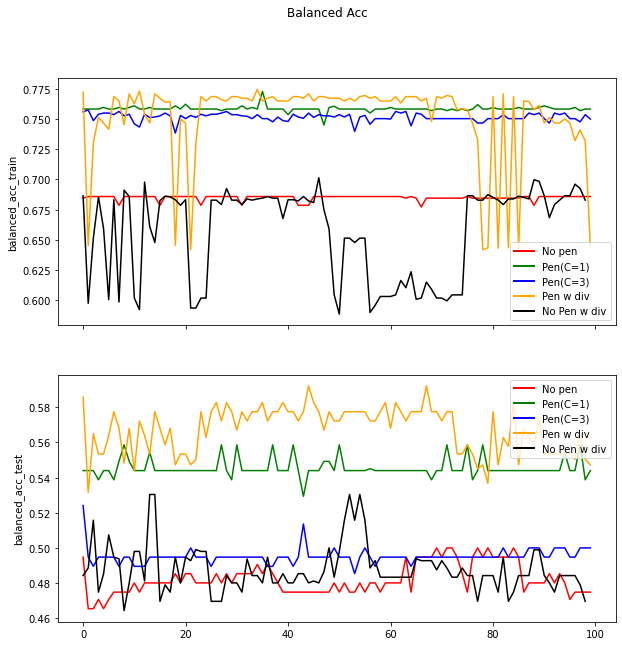

In [14]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 10))

fig.suptitle("Balanced Acc")
ax1.legend(custom_lines, ["No pen", "Pen(C=1)","Pen(C=3)", "Pen w div", "No Pen w div"])
ax2.legend(custom_lines, ["No pen", "Pen(C=1)","Pen(C=3)", "Pen w div", "No Pen w div"])

sns.lineplot(x=model_w_no_pen_df.index, y="balanced_acc_train", data=model_w_no_pen_df, color="red", ax=ax1)
sns.lineplot(x=models_w_pen_df.index, y="balanced_acc_train", data=models_w_pen_df, color="green", ax=ax1)
sns.lineplot(x=models_w_pen_c3_df.index, y="balanced_acc_train", data=models_w_pen_c3_df, color="blue", ax=ax1)
sns.lineplot(x=models_w_pen_div_df.index, y="balanced_acc_train", data=models_w_pen_div_df, color="orange", ax=ax1)
sns.lineplot(x=models_w_no_pen_div_df.index, y="balanced_acc_train", data=models_w_no_pen_div_df,  color="black", ax=ax1)

sns.lineplot(x=model_w_no_pen_df.index, y="balanced_acc_test", data=model_w_no_pen_df, color="red", ax=ax2)
sns.lineplot(x=models_w_pen_df.index, y="balanced_acc_test", data=models_w_pen_df, color="green", ax=ax2)
sns.lineplot(x=models_w_pen_c3_df.index, y="balanced_acc_test", data=models_w_pen_c3_df, color="blue", ax=ax2)
sns.lineplot(x=models_w_pen_div_df.index, y="balanced_acc_test", data=models_w_pen_div_df, color="orange", ax=ax2)
sns.lineplot(x=models_w_no_pen_div_df.index, y="balanced_acc_test", data=models_w_no_pen_div_df,  color="black", ax=ax2)

<AxesSubplot:ylabel='precision_test'>

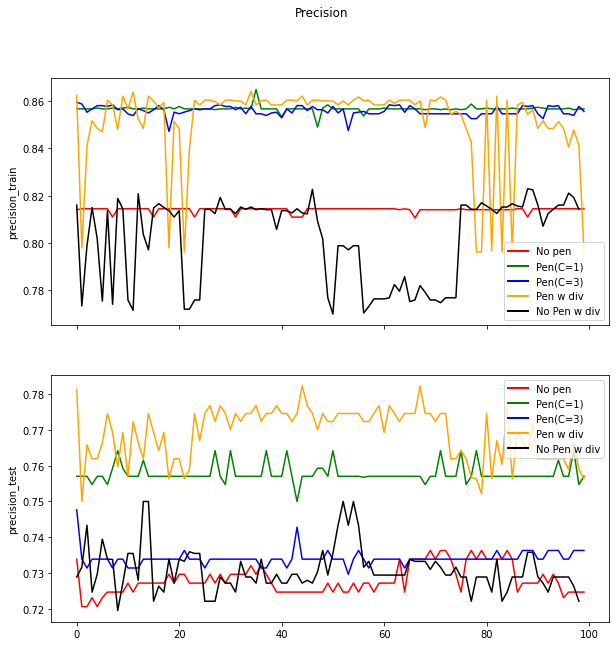

In [15]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 10))

fig.suptitle("Precision")
ax1.legend(custom_lines, ["No pen", "Pen(C=1)","Pen(C=3)", "Pen w div", "No Pen w div"])
ax2.legend(custom_lines, ["No pen", "Pen(C=1)","Pen(C=3)", "Pen w div", "No Pen w div"])

sns.lineplot(x=model_w_no_pen_df.index, y="precision_train", data=model_w_no_pen_df, color="red", ax=ax1)
sns.lineplot(x=models_w_pen_df.index, y="precision_train", data=models_w_pen_df, color="green", ax=ax1)
sns.lineplot(x=models_w_pen_c3_df.index, y="precision_train", data=models_w_pen_c3_df, color="blue", ax=ax1)
sns.lineplot(x=models_w_pen_div_df.index, y="precision_train", data=models_w_pen_div_df, color="orange", ax=ax1)
sns.lineplot(x=models_w_no_pen_div_df.index, y="precision_train", data=models_w_no_pen_div_df, color="black", ax=ax1)

sns.lineplot(x=model_w_no_pen_df.index, y="precision_test", data=model_w_no_pen_df, color="red", ax=ax2)
sns.lineplot(x=models_w_pen_df.index, y="precision_test", data=models_w_pen_df, color="green", ax=ax2)
sns.lineplot(x=models_w_pen_c3_df.index, y="precision_test", data=models_w_pen_c3_df, color="blue", ax=ax2)
sns.lineplot(x=models_w_pen_div_df.index, y="precision_test", data=models_w_pen_div_df, color="orange", ax=ax2)
sns.lineplot(x=models_w_no_pen_div_df.index, y="precision_test", data=models_w_no_pen_div_df, color="black", ax=ax2)

<AxesSubplot:ylabel='complexity'>

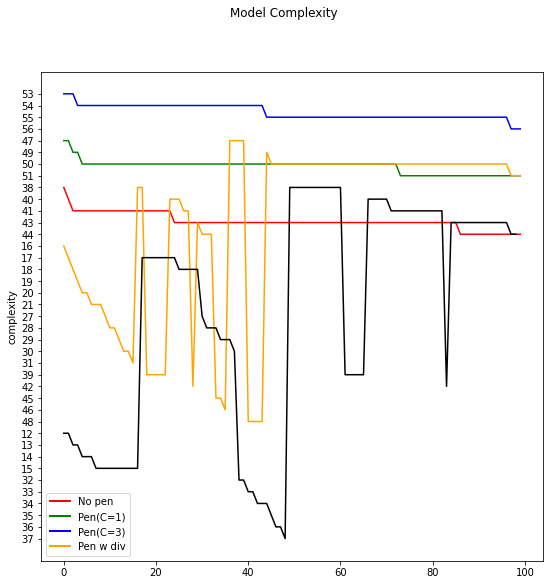

In [17]:
fig, ax = plt.subplots(figsize=(9, 9))
fig.suptitle("Model Complexity")

ax.legend(custom_lines, ["No pen", "Pen(C=1)","Pen(C=3)", "Pen w div"])
ax.legend(custom_lines, ["No pen", "Pen(C=1)","Pen(C=3)", "Pen w div"])
sns.lineplot(x=models_w_pen_c3_df.index, y="complexity", data=models_w_pen_c3_df.sort_values(by="complexity", ascending=True), color="blue", ax=ax)
sns.lineplot(x=models_w_pen_df.index, y="complexity", data=models_w_pen_df.sort_values(by="complexity", ascending=True), color="green", ax=ax)
sns.lineplot(x=model_w_no_pen_df.index, y="complexity", data=model_w_no_pen_df.sort_values(by="complexity", ascending=True), color="red", ax=ax)
sns.lineplot(x=models_w_pen_div_df.index, y="complexity", data=models_w_pen_div_df.sort_values(by="complexity", ascending=True).sort_values(by="complexity", ascending=True), color="orange", ax=ax)
sns.lineplot(x=models_w_no_pen_div_df.index, y="complexity", data=models_w_no_pen_div_df.sort_values(by="complexity", ascending=True).sort_values(by="complexity", ascending=True), color="black", ax=ax)

In [78]:
no_pen_log_df = pd.read_csv("data/logs/asmoses-top-100-feats_no_pen_1.csv")
pen_log_df = pd.read_csv("data/logs/asmoses-top-100-feats_pen_1.csv")
pen_log_c3_df = pd.read_csv("data/logs/asmoses-top-100-feats_pen_1_coef3.csv")
pen_log_div_df = pd.read_csv("data/logs/asmoses-top-100-feats_pen_div_1.csv")

In [79]:
print("No penalty Log")
display(no_pen_log_df)

print("Penalty Log")
display(pen_log_df)

print("Penalty Log (C=3)")
display(pen_log_c3_df)

print("Penalty Log w div")
display(pen_log_div_df)

No penalty Log
Penalty Log
Penalty Log (C=3)
Penalty Log w div


,time,gen,num_evals,elapsed,metapop_size,best_score,complexity,field_set_size,optim_steps,over_budget
0,0.000,1,10505,6,497,-105,16,0,11,0
1,76.392,2,26032,83,250,-84,30,0,9,0
2,366.918,3,46379,373,250,-75,37,0,7,0
3,815.206,4,66213,821,1854,-73,39,0,4,0
4,1273.979,5,87497,1280,495,-70,43,0,4,0
5,1725.487,6,100000,1732,4552,-70,43,0,2,1


,time,gen,num_evals,elapsed,metapop_size,best_score,complexity,field_set_size,optim_steps,over_budget
0,0.000,1,13357,10,351,-99,19,0,14,0
1,120.082,2,30449,130,250,-76,31,0,8,0
2,470.433,3,52690,480,250,-66,40,0,7,0
3,1108.950,4,77491,1119,250,-59,46,0,6,0
4,1915.364,5,98692,1925,1738,-57,49,0,3,0
5,2215.134,6,100000,2225,2111,-57,49,0,2,1


,time,gen,num_evals,elapsed,metapop_size,best_score,complexity,field_set_size,optim_steps,over_budget
0,0.000,1,16396,16,320,-93,25,0,17,0
1,273.302,2,38618,289,250,-79,43,0,9,0
2,1031.447,3,62219,1047,250,-73,50,0,5,0
3,2046.849,4,85820,2062,286,-69,53,0,5,0
4,2847.748,5,100000,2863,250,-67,54,0,2,1


,time,gen,num_evals,elapsed,metapop_size,best_score,complexity,field_set_size,optim_steps,over_budget,n_pairs,mean_dst,std_dst,min_dst,max_dst,best_n_pairs,best_mean_dst,best_std_dst,best_min_dst,best_max_dst
0,0.000,1,13357,10,250,-99,19,0,14,0,0,NaN,0,1.797690e+308,-1.797690e+308,4950,0.616194,1.22503,0,7.48331
1,119.648,2,30449,130,250,-76,31,0,8,0,0,NaN,0,1.797690e+308,-1.797690e+308,4950,1.835940,2.25685,0,8.94427
2,462.127,3,52690,472,250,-66,40,0,7,0,0,NaN,0,1.797690e+308,-1.797690e+308,4950,3.270890,2.61543,0,9.53939
3,1081.361,4,77491,1092,250,-59,46,0,6,0,0,NaN,0,1.797690e+308,-1.797690e+308,4950,3.318990,2.49983,0,9.53939
4,1822.938,5,98692,1833,250,-57,49,0,3,0,0,NaN,0,1.797690e+308,-1.797690e+308,4950,3.432770,2.58635,0,9.69536
5,2098.975,6,100000,2109,250,-56,51,0,2,1,0,NaN,0,1.797690e+308,-1.797690e+308,4950,3.137570,1.84946,1,7.28011
